In [1]:
# Tulis Program Anda Disini!
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [3]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR
!ls

/content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR
chest_xray  split_folder_pneumonia


In [4]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 4/chest_xray.zip"

In [ ]:
# !unzip "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 4/chest_xray.zip" -d "/content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR"

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR/chest_xray/NORMAL/NORMAL2-IM-0412-0001.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR/chest_xray/NORMAL/NORMAL2-IM-0413-0001.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR/chest_xray/NORMAL/NORMAL2-IM-0414-0001.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR/chest_xray/NORMAL/NORMAL2-IM-0415-0001.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR/chest_xray/NORMAL/NORMAL2-IM-0416-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR/chest_xray/NORMAL/NORMAL2-IM-0416-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 

In [5]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

chest_xray  split_folder_pneumonia


In [6]:
import os
base_dataset = "chest_xray"
class_dir = ['NORMAL', 'PNEUMONIA']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".jpeg"):
        os.remove(os.path.join(cur_dir, item))

In [ ]:
!pip install split_folders
import splitfolders

In [7]:
#untuk menetapkan directory

input_folder = "/content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR/chest_xray"
base_dir = "/content/drive/MyDrive/Colab Notebooks/Semester 7/Temu Kembali Citra/Tugas Besar CBIR/split_folder_pneumonia"

In [ ]:
# splitfolders.ratio(input_folder, output = base_dir, seed=1337, ratio=(0.80,0.19,0.01))

Copying files: 5856 files [02:04, 47.08 files/s]


In [8]:
import os
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

In [9]:
print('Train NORMAL :', os.listdir(train_normal_dir)[:10])
print('Train PNEUMONIA :', os.listdir(train_pneumonia_dir)[:10])
print("\n")

print('Validation NORMAL :', os.listdir(validation_normal_dir)[:10])
print('Validation PNEUMONIA :', os.listdir(validation_pneumonia_dir)[:10])
print("\n")

print('Test NORMAL :', os.listdir(test_normal_dir)[:10])
print('Test PNEUMONIA :', os.listdir(test_pneumonia_dir)[:10])

Train NORMAL : ['IM-0264-0001.jpeg', 'IM-0249-0001.jpeg', 'IM-0245-0001.jpeg', 'IM-0261-0001.jpeg', 'IM-0298-0001.jpeg', 'IM-0325-0001.jpeg', 'IM-0305-0001.jpeg', 'IM-0304-0001.jpeg', 'IM-0302-0001.jpeg', 'IM-0323-0001.jpeg']
Train PNEUMONIA : ['person466_bacteria_1987.jpeg', 'person467_bacteria_1989.jpeg', 'person518_bacteria_2198.jpeg', 'person489_bacteria_2066.jpeg', 'person478_virus_975.jpeg', 'person511_virus_1027.jpeg', 'person488_virus_992.jpeg', 'person472_bacteria_2015.jpeg', 'person466_bacteria_1986.jpeg', 'person472_bacteria_2008.jpeg']


Validation NORMAL : ['IM-0001-0001.jpeg', 'IM-0009-0001.jpeg', 'IM-0019-0001.jpeg', 'IM-0033-0001-0002.jpeg', 'IM-0101-0001.jpeg', 'IM-0043-0001.jpeg', 'NORMAL2-IM-0060-0001.jpeg', 'IM-0091-0001.jpeg', 'IM-0083-0001.jpeg', 'IM-0084-0001.jpeg']
Validation PNEUMONIA : ['person139_bacteria_664.jpeg', 'person110_bacteria_531.jpeg', 'person1626_virus_2818.jpeg', 'person109_bacteria_528.jpeg', 'person128_bacteria_605.jpeg', 'person100_bacteria_47

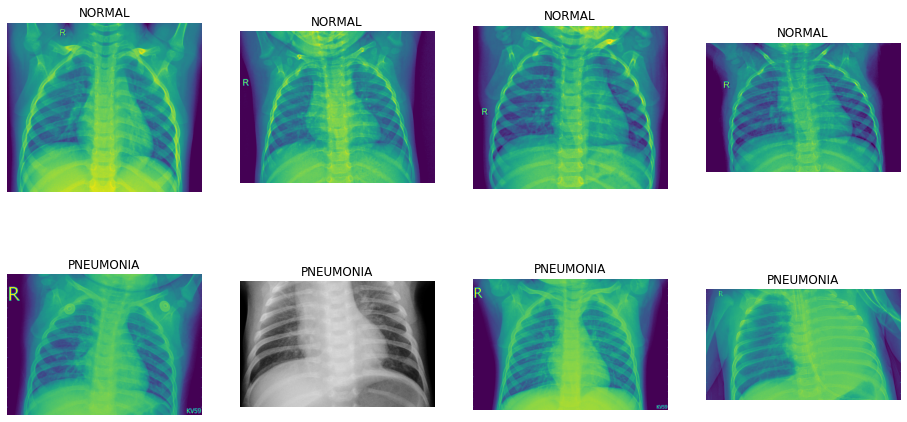

In [10]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8

train_normal = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]

train_pneumonia = [os.path.join(train_pneumonia_dir, fname) 
                for fname in os.listdir(train_pneumonia_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(train_normal+train_pneumonia):
    
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

In [11]:
print('Train NORMAL :', len(os.listdir(train_normal_dir)))
print('Train PNEUMONIA :', len(os.listdir(train_pneumonia_dir)))
print("\n")

print('Validation NORMAL :', len(os.listdir(validation_normal_dir)))
print('Validation PNEUMONIA :', len(os.listdir(validation_pneumonia_dir)))
print("\n")

print('Test NORMAL :', len(os.listdir(test_normal_dir)))
print('Test PNEUMONIA :', len(os.listdir(test_pneumonia_dir)))

Train NORMAL : 1266
Train PNEUMONIA : 3418


Validation NORMAL : 300
Validation PNEUMONIA : 811


Test NORMAL : 17
Test PNEUMONIA : 44


In [12]:
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# import library to build our model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.vgg16 import preprocess_input

# plotting
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np

In [13]:
height = 100
width = 100
batch_size = 32

generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    class_mode='binary',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    validation_dir,
    target_size=(height,width),
    class_mode='binary',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(height,width),
    class_mode='binary',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 4684 images belonging to 2 classes.
Found 1111 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [14]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [15]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [16]:
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [17]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (4684, 100, 100, 3)
Train Label =  (4684,)
Validation Data =  (1111, 100, 100, 3)
Validation Label =  (1111,)
Test Data =  (61, 100, 100, 3)
Test Label =  (61,)


In [18]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [19]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[3419:3422])
print("Label sebelum di-encoder ", train_label[2343:2346])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[3419:3422])
print("Label setelah di-encoder ", y_train[2343:2346])

Label sebelum di-encoder  ['PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA']
Label sebelum di-encoder  ['PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA']
Label setelah di-encoder  [1 1 1]
Label setelah di-encoder  [1 1 1]


In [ ]:
x_train.shape

(4684, 100, 100, 3)

In [ ]:
x_val.shape

(1111, 100, 100, 3)

In [ ]:
x_test.shape

(61, 100, 100, 3)

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPool2D, MaxPooling2D, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Flatten, BatchNormalization

In [ ]:
DESIRED_ACCURACY = 0.95

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('acc') is not None and logs.get('acc') >= DESIRED_ACCURACY) :
            print('\nReached 95% accuracy so cancelling training!')
            self.model.stop_training = True

callbacks = myCallback()

##Model 1

In [23]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 128)     3584      
                                                                 
 batch_normalization_5 (Batc  (None, 100, 100, 128)    512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 64)        73792     
                                                                 
 batch_normalization_6 (Batc  (None, 50, 50, 64)       256       
 hNormalization)                                                 
                                                      

In [25]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
147/147 [==============================] - 20s 68ms/step - loss: 0.2481 - acc: 0.8980 - val_loss: 1.0184 - val_acc: 0.7213
Epoch 2/100
147/147 [==============================] - 9s 62ms/step - loss: 0.1610 - acc: 0.9413 - val_loss: 2.7894 - val_acc: 0.7213
Epoch 3/100
147/147 [==============================] - 9s 62ms/step - loss: 0.1295 - acc: 0.9505 - val_loss: 2.5388 - val_acc: 0.7213
Epoch 4/100
147/147 [==============================] - 9s 62ms/step - loss: 0.1164 - acc: 0.9586 - val_loss: 1.0134 - val_acc: 0.7541
Epoch 5/100
147/147 [==============================] - 9s 62ms/step - loss: 0.1137 - acc: 0.9524 - val_loss: 0.2582 - val_acc: 0.8689
Epoch 6/100
147/147 [==============================] - 9s 61ms/step - loss: 0.1024 - acc: 0.9616 - val_loss: 0.4186 - val_acc: 0.8525
Epoch 7/100
147/147 [==============================] - 9s 62ms/step - loss: 0.0861 - acc: 0.9669 - val_loss: 0.3298 - val_acc: 0.8852
Epoch 8/100
147/147 [==============================] - 9s 62m

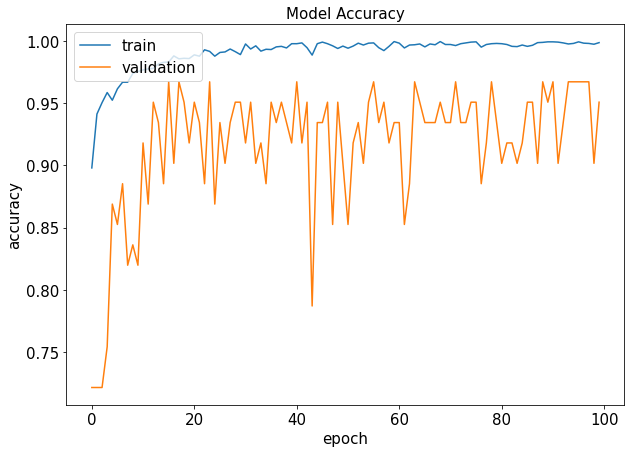

In [26]:
# summarize history for accuracy
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

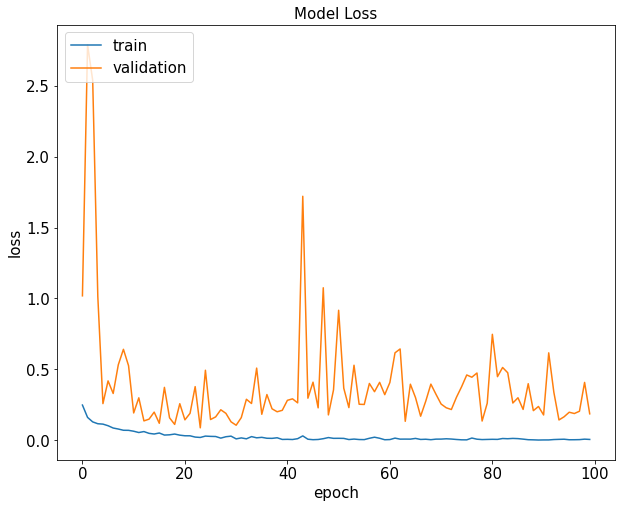

In [27]:
plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

In [35]:
model.save('/content/drive/MyDrive/Pneumonia Dataset/Model/BatchNormModelCNN.h5')
model.save('/content/drive/MyDrive/Pneumonia Dataset/Model/DropoutModelCNN.h5')

In [28]:
from sklearn.metrics import classification_report

In [36]:
from keras.models import load_model

# load model pertama
target_dir = '/content/drive/MyDrive/Pneumonia Dataset/Model'
model_saved = load_model(target_dir + '/BatchNormModelCNN.h5')

In [43]:
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['NORMAL', 'PNEUMONIA']


In [44]:
from sklearn.metrics import classification_report

predictions = model.predict(x_test)
predictions = np.round(predictions).astype(int)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.96      0.98      0.97        44

    accuracy                           0.95        61
   macro avg       0.95      0.93      0.94        61
weighted avg       0.95      0.95      0.95        61



In [45]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

Confusion Matrix
Normalized confusion matrix


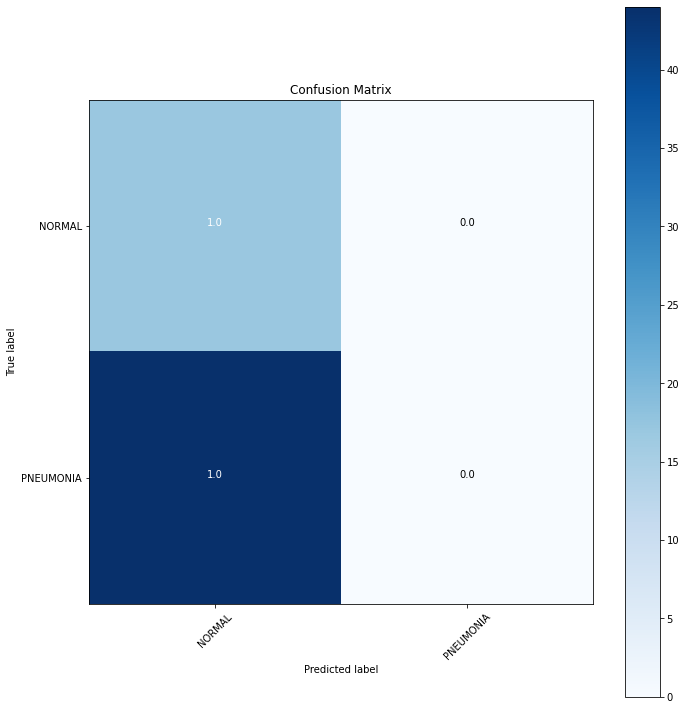

In [49]:
from sklearn.metrics import  confusion_matrix
import itertools

pred = model.predict(test_generator)
labels = np.argmax(pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, labels)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

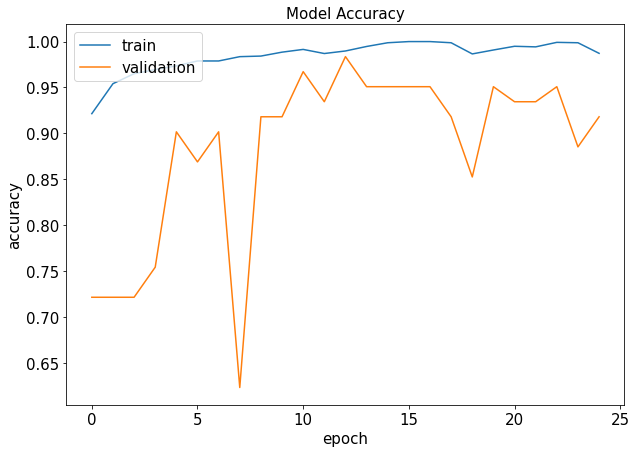

In [ ]:
# summarize history for accuracy
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

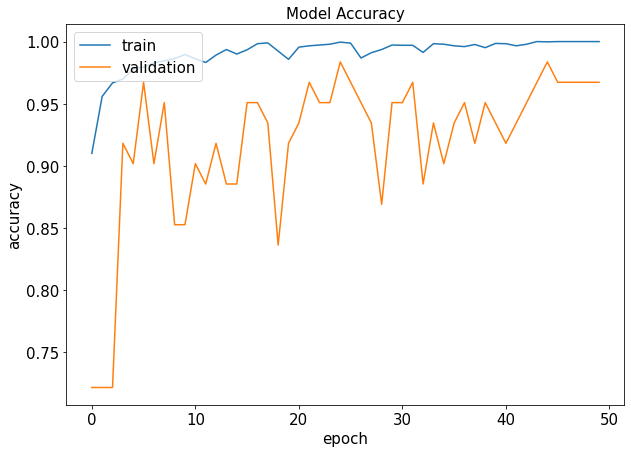

In [ ]:
# summarize history for accuracy
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

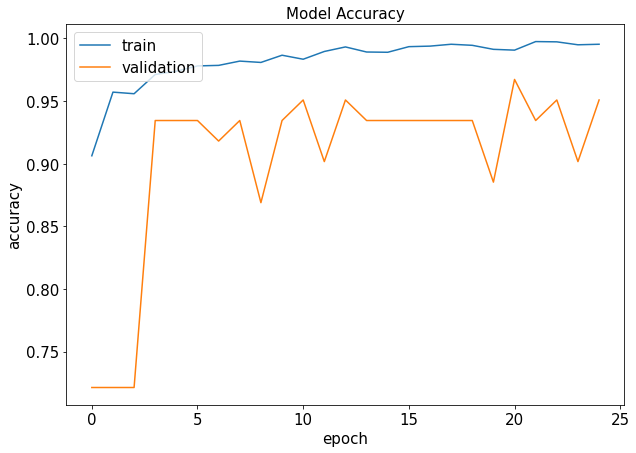

In [ ]:
# summarize history for accuracy
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

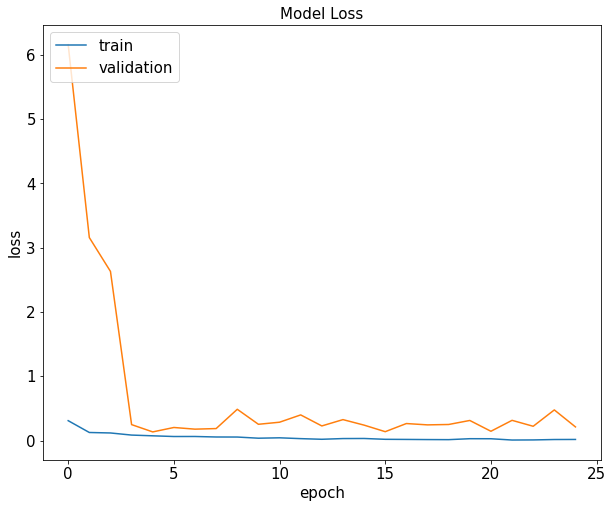

In [ ]:
plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(x_test)
predictions = np.round(predictions).astype(int)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.98      0.95      0.97        44

    accuracy                           0.95        61
   macro avg       0.93      0.95      0.94        61
weighted avg       0.95      0.95      0.95        61



In [ ]:
from sklearn.metrics import  confusion_matrix
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix


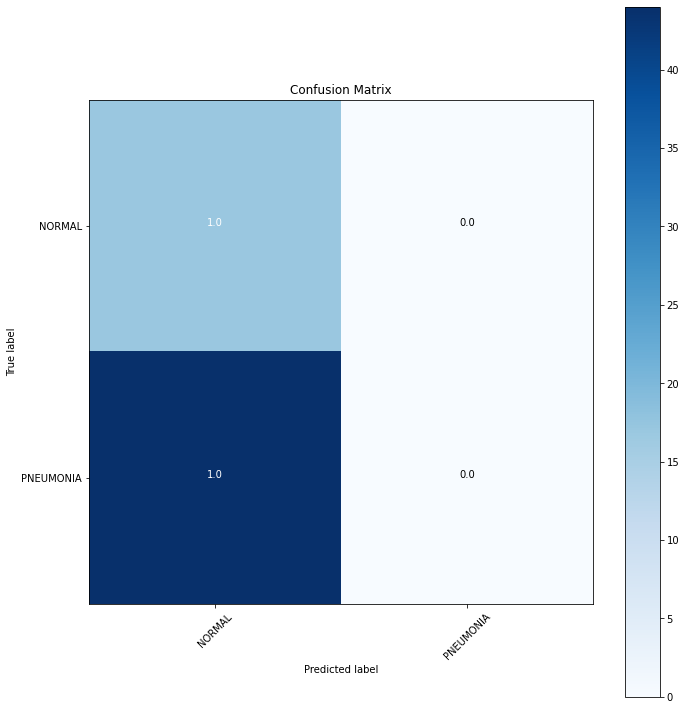

In [ ]:
pred = model.predict(test_generator)
labels = np.argmax(pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, labels)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

##Model 2

In [ ]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Dropout(0.15))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 batch_normalization_11 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 batch_normalization_12 (Bat  (None, 50, 50, 64)       256       
 chNormalization)                                                
                                                      

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

history1 = model.fit(x_train, y_train, batch_size=32, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
147/147 [==============================] - 10s 45ms/step - loss: 0.2986 - acc: 0.9157 - val_loss: 12.6283 - val_acc: 0.7213
Epoch 2/25
147/147 [==============================] - 6s 39ms/step - loss: 0.1182 - acc: 0.9586 - val_loss: 4.3505 - val_acc: 0.7213
Epoch 3/25
147/147 [==============================] - 6s 39ms/step - loss: 0.1091 - acc: 0.9601 - val_loss: 2.9430 - val_acc: 0.7213
Epoch 4/25
147/147 [==============================] - 6s 38ms/step - loss: 0.0868 - acc: 0.9661 - val_loss: 0.3091 - val_acc: 0.8852
Epoch 5/25
147/147 [==============================] - 6s 39ms/step - loss: 0.0743 - acc: 0.9746 - val_loss: 0.1420 - val_acc: 0.9180
Epoch 6/25
147/147 [==============================] - 6s 38ms/step - loss: 0.0688 - acc: 0.9746 - val_loss: 0.3884 - val_acc: 0.9016
Epoch 7/25
147/147 [==============================] - 6s 39ms/step - loss: 0.0504 - acc: 0.9821 - val_loss: 0.1694 - val_acc: 0.9508
Epoch 8/25
147/147 [==============================] - 6s 42ms/step 

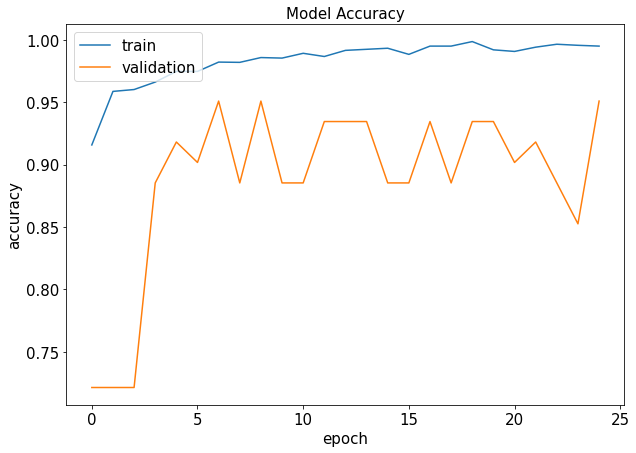

In [ ]:
# summarize history for accuracy
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

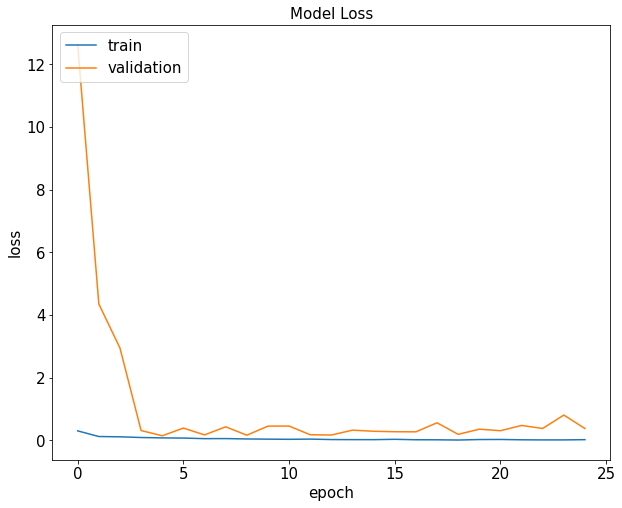

In [ ]:
plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

In [ ]:
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['NORMAL', 'PNEUMONIA']


In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(x_test)
predictions = np.round(predictions).astype(int)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.28      1.00      0.44        17
           1       0.00      0.00      0.00        44

    accuracy                           0.28        61
   macro avg       0.14      0.50      0.22        61
weighted avg       0.08      0.28      0.12        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import  confusion_matrix
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix


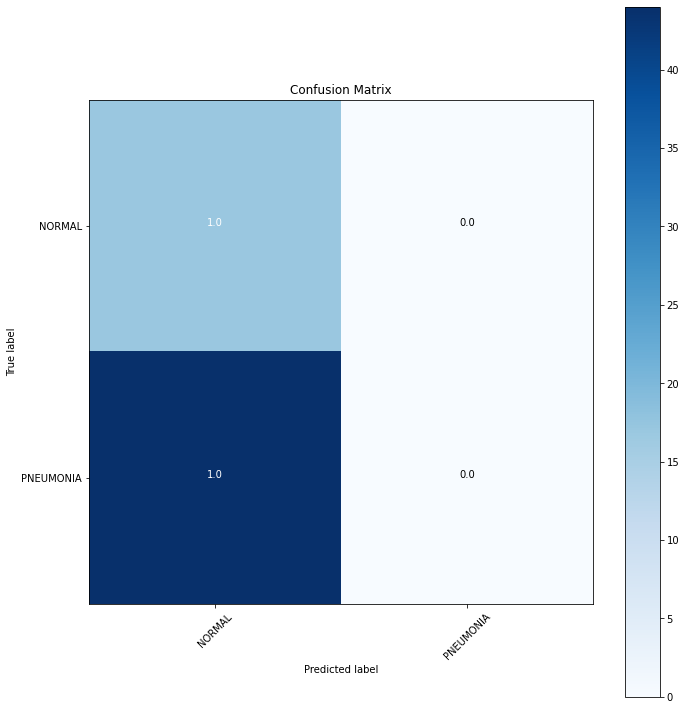

In [ ]:
pred = model.predict(test_generator)
labels = np.argmax(pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, labels)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

##Model 3

In [ ]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))

model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 100, 100, 512)     14336     
                                                                 
 batch_normalization_15 (Bat  (None, 100, 100, 512)    2048      
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 50, 50, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 256)       1179904   
                                                                 
 batch_normalization_16 (Bat  (None, 50, 50, 256)      1024      
 chNormalization)                                                
                                                      

In [ ]:
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['NORMAL', 'PNEUMONIA']


In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(x_test)
predictions = np.round(predictions).astype(int)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.28      1.00      0.44        17
           1       0.00      0.00      0.00        44

    accuracy                           0.28        61
   macro avg       0.14      0.50      0.22        61
weighted avg       0.08      0.28      0.12        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import  confusion_matrix
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix


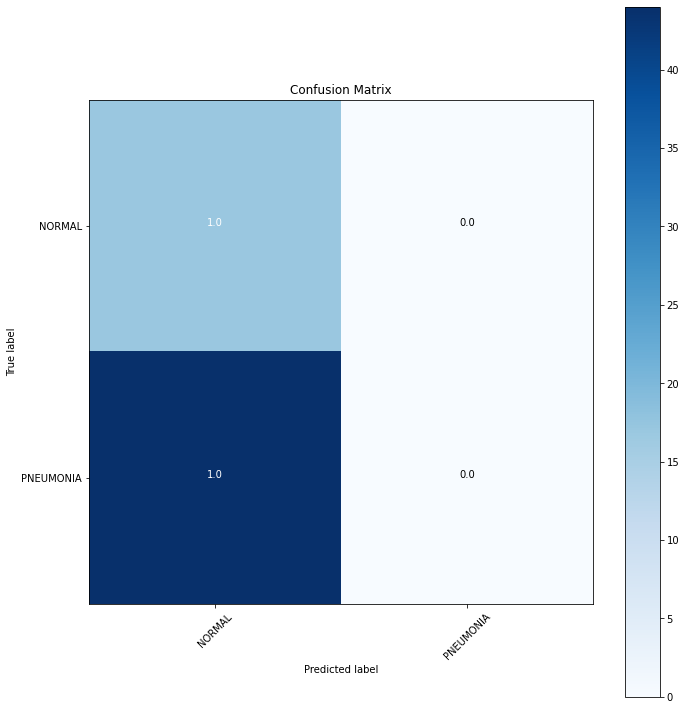

In [ ]:
pred = model.predict(test_generator)
labels = np.argmax(pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, labels)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')